In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load our dataset

In [2]:
df = pd.read_csv("loan_data_set.csv")

df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Data information


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# independent variable


the independent variable here is Loan_Status, and its already at the end of the columns

# information about data

In [3]:
print(f"Number of rows: {len(df)}")
df.describe(include="all")

NameError: name 'df' is not defined

# first impression on the statistics:

1) missing 13 records from the gender column which can be handeled easily
2) also missing 3 records from the married column which also can be handeled easily
3) all Loan_ID are unique
4) missing some records from Dependents and Self_Employed

5) the Applicantincome and CoapplicantIncome can be merged and represented as one column
6) the Applicantincome :
    as a 75% of the records are under 5795 , and the max is 81000 so there might be some outliers
   
7) the CoapplicantIncome :
    as a 75% of the records are under 2297.25 , and the max is 41667 so there might be some outliers

8) the loan amount has some missing records, also there might be someout outliers since that the maximum is 700 while 75% of the data is under 168


# visualizations

 we can see who paid the loans or who didn't

Y    422
N    192
Name: Loan_Status, dtype: int64


<AxesSubplot:>

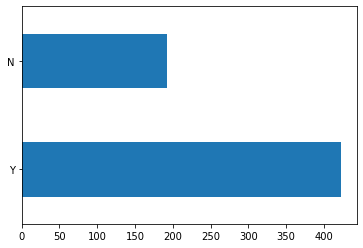

In [5]:
counts_paid = df["Loan_Status"].value_counts()
print(counts_paid)

counts_paid.plot(kind='barh')

<AxesSubplot:ylabel='Loan_Status'>

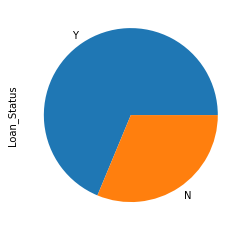

In [6]:
counts_paid.plot(kind='pie')

# lets see if the loan status related to gender


Y    339
N    150
Name: Loan_Status, dtype: int64


<AxesSubplot:>

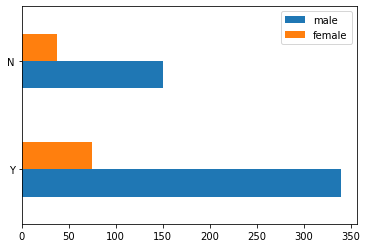

In [7]:
#fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(20,8))
df_male = df.Loan_Status[df.Gender == "Male"].value_counts()
df_female = df.Loan_Status[df.Gender == "Female"].value_counts()

print(df_male)
df_viz = pd.DataFrame({'male':df_male, 'female':df_female})

df_viz.plot(kind='barh')

# showing the relation between married or not with paying

<AxesSubplot:>

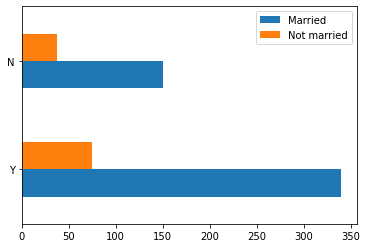

In [8]:
df_married = df.Loan_Status[df.Married == "Yes"].value_counts()
df_not_married = df.Loan_Status[df.Gender == "No"].value_counts()


df_viz = pd.DataFrame({'Married':df_male, 'Not married':df_female})

df_viz.plot(kind='barh')

it shows a great amount of married customers where able to pay 

# check for incosistency in data

In [9]:
df.info()
df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
unique_value_gender = df['Gender'].unique()
unique_value_married = df['Married'].unique()
unique_value_education = df['Education'].unique()
unique_value_self_employed = df['Self_Employed'].unique()
unique_value_Property_Area = df['Property_Area'].unique()

print(unique_value_education)
print(unique_value_gender)
print(unique_value_married)
print(unique_value_self_employed)
print(unique_value_Property_Area)

['Graduate' 'Not Graduate']
['Male' 'Female' nan]
['No' 'Yes' nan]
['No' 'Yes' nan]
['Urban' 'Rural' 'Semiurban']


In [11]:
df.applymap(type).apply(pd.value_counts).fillna(0)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
<class 'str'>,614.0,601.0,611.0,599.0,614.0,582.0,0.0,0.0,0.0,0.0,0.0,614.0,614.0
<class 'float'>,0.0,13.0,3.0,15.0,0.0,32.0,0.0,614.0,614.0,614.0,614.0,0.0,0.0
<class 'int'>,0.0,0.0,0.0,0.0,0.0,0.0,614.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# # nans are being read as floats so fixing it
# df['Gender'] = df['Gender'].astype('str')
# df['Married'] = df['Married'].astype('str')
# df['Dependents'] = df['Dependents'].astype('str')
# df['Self_Employed'] = df['Self_Employed'].astype('str')

# df.applymap(type).apply(pd.value_counts).fillna(0)

# Remove unneeded columns

applicantincome and coapplicant income can be represented as one column called income


In [13]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [14]:
total_income = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome'] = total_income
df.pop('ApplicantIncome')
df.pop('CoapplicantIncome')
df


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,Y,7583.0


In [15]:
col = df.pop('Loan_Status')
df=pd.concat([df,col], axis=1)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,5849.0,Y
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,2900.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,4106.0,Y
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,8312.0,Y
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,7583.0,Y


In [16]:
#removing columns with only one uniuqe value
df = df.loc[:,df.apply(pd.Series.nunique, axis=0)!=1]
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
0,LP001002,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,5849.0,Y
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,2900.0,Y
610,LP002979,Male,Yes,3+,Graduate,No,40.0,180.0,1.0,Rural,4106.0,Y
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,8312.0,Y
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,7583.0,Y


In [17]:
#checking for variance 
for col in df.select_dtypes(include=np.number).columns:
    print(f"variance of{col} is {df.var()[col]}")

variance ofLoanAmount is 7325.190241002422
variance ofLoan_Amount_Term is 4240.667779632721
variance ofCredit_History is 0.13313618784878373
variance ofTotalIncome is 41714339.01398839


C:\Users\ahmed\AppData\Local\Temp/ipykernel_11604/3900481227.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(f"variance of{col} is {df.var()[col]}")


In [18]:
# checking coorelations
df.corr()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
LoanAmount,1.000000,0.039447,-0.008433,0.624621
Loan_Amount_Term,0.039447,1.000000,0.001470,-0.069948
Credit_History,-0.008433,0.001470,1.000000,-0.015109
TotalIncome,0.624621,-0.069948,-0.015109,1.000000


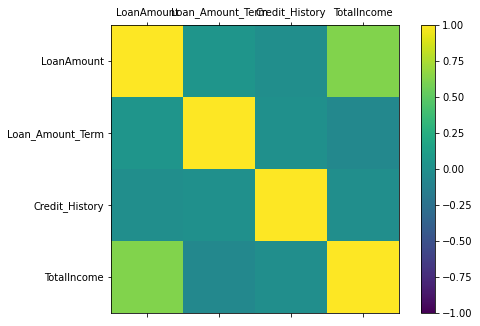

In [19]:
corr = df.corr()
# To visualize correlation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
c_ax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(c_ax)
ticks = np.arange(0,len(corr.columns.tolist()),1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr.columns.tolist())
ax.set_yticklabels(corr.columns.tolist())
plt.show()

# checking for outliers



In [20]:
df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,592.000000,600.00000,564.000000,614.000000
mean,146.412162,342.00000,0.842199,7024.705081
std,85.587325,65.12041,0.364878,6458.663872
min,9.000000,12.00000,0.000000,1442.000000
25%,100.000000,360.00000,1.000000,4166.000000
50%,128.000000,360.00000,1.000000,5416.500000
75%,168.000000,360.00000,1.000000,7521.750000
max,700.000000,480.00000,1.000000,81000.000000


In [21]:
# skewness check
for col in df.select_dtypes(include=np.number).columns:
    print(f"skewness of {col} is {df[col].skew()}")

skewness of LoanAmount is 2.677551679256059
skewness of Loan_Amount_Term is -2.362414124216269
skewness of Credit_History is -1.8823610612186696
skewness of TotalIncome is 5.633448514884535


<AxesSubplot:>

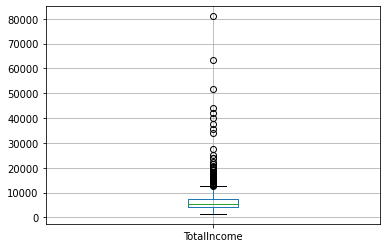

In [22]:
#using box plot 
df.boxplot(column='TotalIncome')


<AxesSubplot:ylabel='Frequency'>

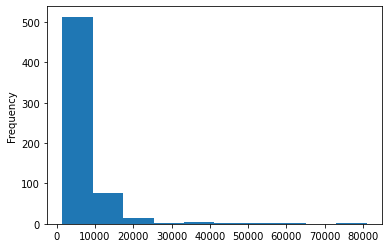

In [23]:
df["TotalIncome"].plot(kind="hist")

In [24]:
def filter_IQR2(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    print(f"====== {column_name} ======")
    print(f"First Quartile Q1: {Q1}")
    print(f"Third Quartile Q3: {Q3}")
    print(f"The inter-quartile range: {IQR} \n")
    
    print(f"length of data before filtering is {len(df)}")
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    
    not_outlier_list = [val for val in df[col] if ((val >= lower_range) & (val <= upper_range))]
    filtered = df.loc[df[col].isin(not_outlier_list)]
    print(f"length of data after filtering is {len(filtered)}\n")

    return filtered.index.tolist()

index_set = set(df.index.tolist())
for col in ["TotalIncome", "LoanAmount", "Loan_Amount_Term"]:
    index_set = set(filter_IQR2(df, col)).intersection(index_set)
#     print(index_set)

df=df.loc[set(index_set)]

====== TotalIncome ======
First Quartile Q1: 4166.0
Third Quartile Q3: 7521.75
The inter-quartile range: 3355.75 

length of data before filtering is 614
length of data after filtering is 564

====== LoanAmount ======
First Quartile Q1: 100.0
Third Quartile Q3: 168.0
The inter-quartile range: 68.0 

length of data before filtering is 614
length of data after filtering is 553

====== Loan_Amount_Term ======
First Quartile Q1: 360.0
Third Quartile Q3: 360.0
The inter-quartile range: 0.0 

length of data before filtering is 614
length of data after filtering is 512



In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,9613.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,108.0,360.0,1.0,Rural,5182.0,Y
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,2900.0,Y
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,8312.0,Y
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,7583.0,Y


<AxesSubplot:ylabel='Frequency'>

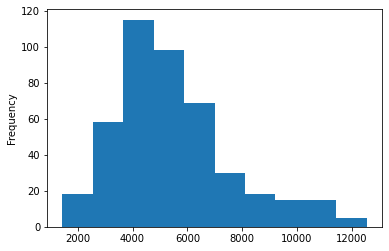

In [26]:
# checking after cleaning
df["TotalIncome"].plot(kind="hist")

<AxesSubplot:>

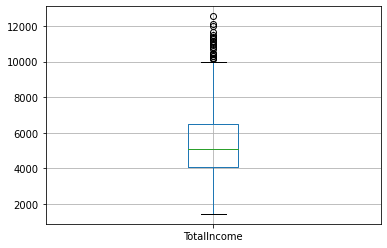

In [27]:
df.boxplot(column='TotalIncome')

In [28]:
df.describe()

,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome
count,441.000000,441.0,402.000000,441.000000
mean,131.013605,360.0,0.863184,5520.893696
std,46.971411,0.0,0.344081,2123.933460
min,9.000000,360.0,0.000000,1442.000000
25%,100.000000,360.0,1.000000,4082.000000
50%,126.000000,360.0,1.000000,5093.000000
75%,159.000000,360.0,1.000000,6486.000000
max,267.000000,360.0,1.000000,12543.000000


# checking for duplicates

In [29]:
print(df.duplicated(keep='first'),"\n")
print(df[df.duplicated()],'\n')

1      False
2      False
3      False
4      False
5      False
       ...  
608    False
609    False
611    False
612    False
613    False
Length: 441, dtype: bool 

Empty DataFrame
Columns: [Loan_ID, Gender, Married, Dependents, Education, Self_Employed, LoanAmount, Loan_Amount_Term, Credit_History, Property_Area, TotalIncome, Loan_Status]
Index: [] 



# handling missing values


In [30]:
# checking fro missing data
print(df.isna().sum())
df.describe(include='all')

Loan_ID              0
Gender               8
Married              1
Dependents           9
Education            0
Self_Employed       25
LoanAmount           0
Loan_Amount_Term     0
Credit_History      39
Property_Area        0
TotalIncome          0
Loan_Status          0
dtype: int64


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
count,441,433,440,432,441,416,441.000000,441.0,402.000000,441,441.000000,441
unique,441,2,2,4,2,2,NaN,NaN,NaN,3,NaN,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,Semiurban,NaN,Y
freq,1,346,281,263,347,367,NaN,NaN,NaN,176,NaN,317
mean,NaN,NaN,NaN,NaN,NaN,NaN,131.013605,360.0,0.863184,NaN,5520.893696,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,46.971411,0.0,0.344081,NaN,2123.933460,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,360.0,0.000000,NaN,1442.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,360.0,1.000000,NaN,4082.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,360.0,1.000000,NaN,5093.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,159.000000,360.0,1.000000,NaN,6486.000000,NaN


In [31]:
## Remove columns having missing values more than certain threshold.
df.loc[:, ~(df.isna().mean() > 0.2)]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,6091.0,N
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,3000.0,Y
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,4941.0,Y
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,6000.0,Y
5,LP001011,Male,Yes,2,Graduate,Yes,267.0,360.0,1.0,Urban,9613.0,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,108.0,360.0,1.0,Rural,5182.0,Y
609,LP002978,Female,No,0,Graduate,No,71.0,360.0,1.0,Rural,2900.0,Y
611,LP002983,Male,Yes,1,Graduate,No,253.0,360.0,1.0,Urban,8312.0,Y
612,LP002984,Male,Yes,2,Graduate,No,187.0,360.0,1.0,Urban,7583.0,Y


In [32]:
# imputation for numeric columns
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="mean")
for col in df.select_dtypes(include=np.number).columns:
    df[col] = imputer.fit_transform(pd.DataFrame(df[col]))
    
df.isna().sum()

Loan_ID              0
Gender               8
Married              1
Dependents           9
Education            0
Self_Employed       25
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
TotalIncome          0
Loan_Status          0
dtype: int64

In [35]:
#Imputation for categorical columns with most frequent value
for column in df.select_dtypes(include=object).columns:
    df[column] = df[column].fillna(value=df[column].mode()[0])
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
count,441,441,441,441,441,441,441.000000,441.0,441.000000,441,441.000000,441
unique,441,2,2,4,2,2,NaN,NaN,NaN,3,NaN,2
top,LP001003,Male,Yes,0,Graduate,No,NaN,NaN,NaN,Semiurban,NaN,Y
freq,1,354,282,272,347,392,NaN,NaN,NaN,176,NaN,317
mean,NaN,NaN,NaN,NaN,NaN,NaN,131.013605,360.0,0.863184,NaN,5520.893696,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,46.971411,0.0,0.328478,NaN,2123.933460,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,9.000000,360.0,0.000000,NaN,1442.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,360.0,1.000000,NaN,4082.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,126.000000,360.0,1.000000,NaN,5093.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,159.000000,360.0,1.000000,NaN,6486.000000,NaN


# feature Scaling

In [39]:
# normalization 
from sklearn.preprocessing import Normalizer
scaler = Normalizer(norm='l1')

df2 = df.copy()
df2.loc[:, df2.select_dtypes(include=np.number).columns] = scaler.fit_transform(df.loc[:, df2.select_dtypes(include=np.number).columns])
df2


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,0.019453,0.054711,0.000152,Rural,0.925684,N
2,LP001005,Male,Yes,0,Graduate,Yes,0.019259,0.105048,0.000292,Urban,0.875401,Y
3,LP001006,Male,Yes,0,Not Graduate,No,0.022132,0.066396,0.000184,Urban,0.911287,Y
4,LP001008,Male,No,0,Graduate,No,0.021686,0.055368,0.000154,Urban,0.922793,Y
5,LP001011,Male,Yes,2,Graduate,Yes,0.026072,0.035153,0.000098,Urban,0.938678,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,LP002974,Male,Yes,0,Graduate,No,0.019112,0.063706,0.000177,Rural,0.917006,Y
609,LP002978,Female,No,0,Graduate,No,0.021309,0.108043,0.000300,Rural,0.870348,Y
611,LP002983,Male,Yes,1,Graduate,No,0.028344,0.040332,0.000112,Urban,0.931212,Y
612,LP002984,Male,Yes,2,Graduate,No,0.022998,0.044275,0.000123,Urban,0.932604,Y


# Encoding Categorical Features


In [45]:
# # binary encoding
# import category_encoders as ce
# # print(df2.nunique())

# df3 = df2.copy()
# cols = df2.select_dtypes(include=object).columns.tolist()

# enc = ce.BinaryEncoder(cols=cols)

# df3 = enc.fit_transform(df3)
# df3

import category_encoders as ce
df3 = df2.copy()
enc = ce.OrdinalEncoder(cols=df3.select_dtypes(include=object).columns.tolist())


df3 = enc.fit_transform(df3)
df3

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome,Loan_Status
1,1,1,1,1,1,1,0.019453,0.054711,0.000152,1,0.925684,1
2,2,1,1,2,1,2,0.019259,0.105048,0.000292,2,0.875401,2
3,3,1,1,2,2,1,0.022132,0.066396,0.000184,2,0.911287,2
4,4,1,2,2,1,1,0.021686,0.055368,0.000154,2,0.922793,2
5,5,1,1,3,1,2,0.026072,0.035153,0.000098,2,0.938678,2
...,...,...,...,...,...,...,...,...,...,...,...,...
608,437,1,1,2,1,1,0.019112,0.063706,0.000177,1,0.917006,2
609,438,2,2,2,1,1,0.021309,0.108043,0.000300,1,0.870348,2
611,439,1,1,1,1,1,0.028344,0.040332,0.000112,2,0.931212,2
612,440,1,1,3,1,1,0.022998,0.044275,0.000123,2,0.932604,2


trying binary encoder resulted in 28 columns
while label encoder resulted in only 12 columns so its better